# ========================
# 📌 Project Credit
# ========================
# Student Score Predictor
# Developed by: Ornab Biswass
# GitHub Repository: https://github.com/ornabbiswass/StudentScorePredictor



In [19]:
# ========================
# 📌 Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import joblib

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [20]:
# ========================
# 📌 Load Dataset
# ========================
df = pd.read_csv("/content/StudentsPerformance.csv")  # Upload CSV in Colab
print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
ℹ️ Dataset Description:
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.00000

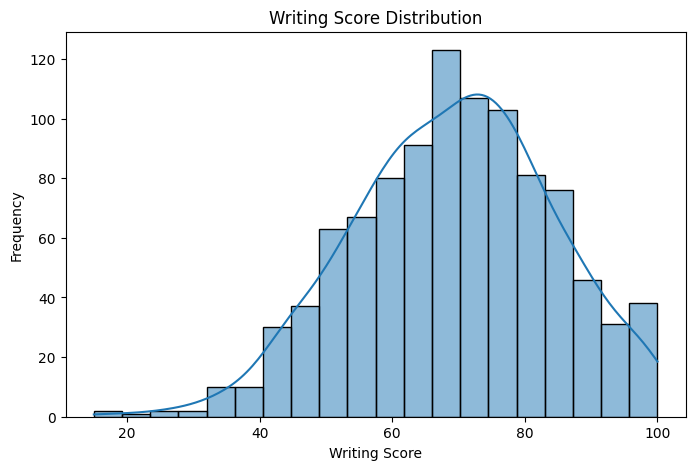


Heatmap



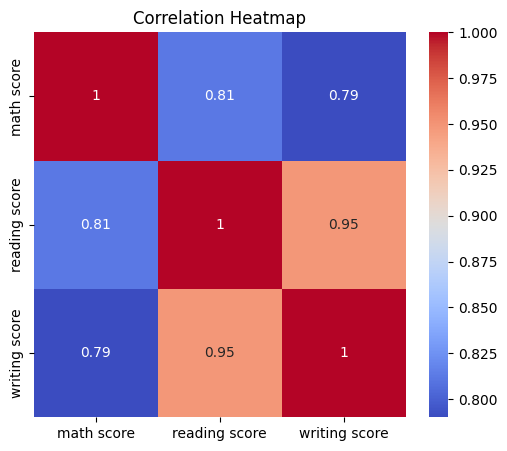


BoxPlot



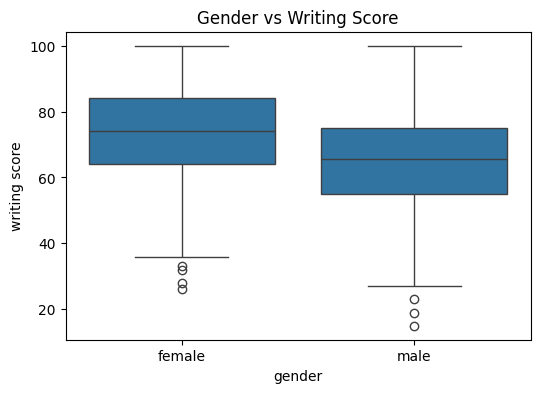

In [32]:
# ========================
# 📌 Exploratory Data Analysis (EDA)
# ========================

# Dataset info
print("ℹ️ Dataset Info:")
print(df.info())

# Dataset statistics
print("ℹ️ Dataset Description:")
print(df.describe())

# Distribution of Writing Score
print("ℹ️ Distribution of Writing Score\n")
plt.figure(figsize=(8,5))
sns.histplot(df['writing score'], bins=20, kde=True)
plt.title("Writing Score Distribution")
plt.xlabel("Writing Score")
plt.ylabel("Frequency")
plt.show()

print("\nHeatmap\n")
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

print("\nBoxPlot\n")
# Boxplot: Gender vs Writing Score
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='writing score', data=df)
plt.title("Gender vs Writing Score")
plt.show()


In [22]:
# ========================
# 📌 Preprocessing
# ========================

X = df.drop(columns=['writing score'])
y = df['writing score']

categorical_cols = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
], remainder="passthrough")

print("✅ Preprocessing pipeline created!")


✅ Preprocessing pipeline created!


In [23]:
# ========================
# 📌 Train/Test Split
# ========================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Train size: {X_train.shape}, Test size: {X_test.shape}")


✅ Train size: (800, 7), Test size: (200, 7)


In [24]:
# ========================
# 📌 Train Models
# ========================

# 1️⃣ Linear Regression
lr_model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])
lr_model.fit(X_train, y_train)

# 2️⃣ Random Forest
rf_model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_model.fit(X_train, y_train)

# 3️⃣ XGBoost
xgb_model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", xgb.XGBRegressor(n_estimators=100, random_state=42))
])
xgb_model.fit(X_train, y_train)

print("✅ All models trained successfully!")


✅ All models trained successfully!


In [25]:
# ========================
# 📌 Evaluate Models
# ========================

models = {"Linear Regression": lr_model,
          "Random Forest": rf_model,
          "XGBoost": xgb_model}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print("✅ Model evaluation completed!")
results_df


✅ Model evaluation completed!


,Model,MAE,RMSE,R²
0,Linear Regression,2.738500,3.456722,0.937256
1,Random Forest,3.218236,3.969830,0.917247
2,XGBoost,3.421367,4.204684,0.907166


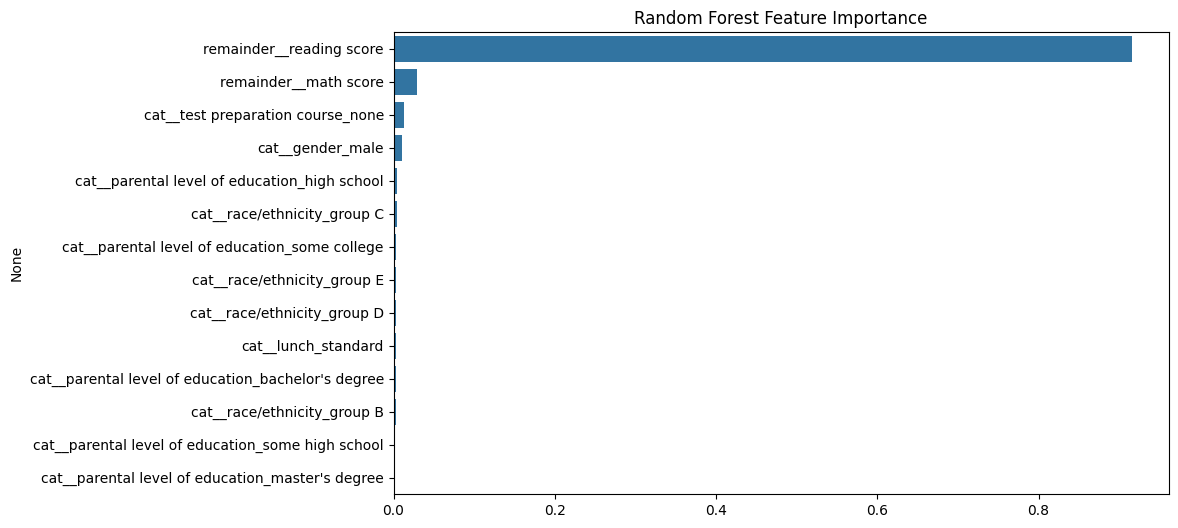

In [26]:
# ========================
# 📌 Feature Importance (Random Forest)
# ========================

rf_importances = rf_model.named_steps['regressor'].feature_importances_
feature_names = rf_model.named_steps['preprocess'].get_feature_names_out()
feat_imp = pd.Series(rf_importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Random Forest Feature Importance")
plt.show()


In [27]:
# ========================
# 📌 Predict Sample Student
# ========================

sample = pd.DataFrame({
    "gender": ["female"],
    "race/ethnicity": ["group B"],
    "parental level of education": ["bachelor's degree"],
    "lunch": ["standard"],
    "test preparation course": ["completed"],
    "math score": [78],
    "reading score": [85]
})

pred = rf_model.predict(sample)
print(f"✅ Predicted Writing Score for sample student: {pred[0]:.2f}")


✅ Predicted Writing Score for sample student: 94.58


In [28]:
# ========================
# 📌 Save Model
# ========================

joblib.dump(rf_model, "/content/student_score_model.pkl")
print("✅ Random Forest model saved as student_score_model.pkl")


✅ Random Forest model saved as student_score_model.pkl


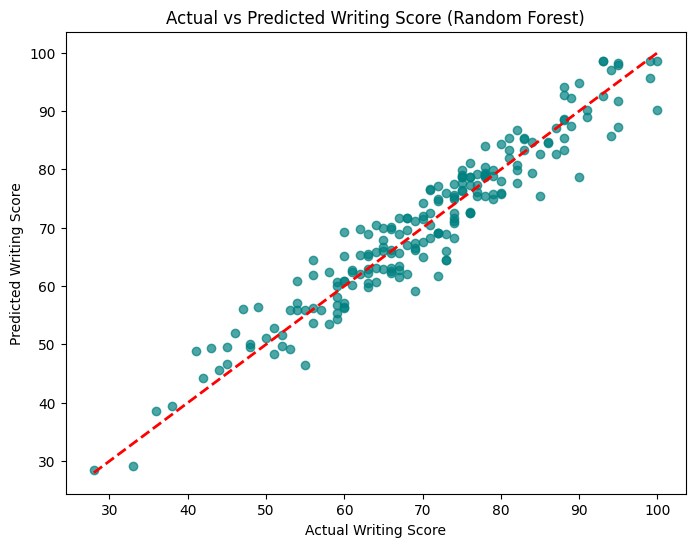

In [29]:
# ========================
# 📌 Actual vs Predicted Plot
# ========================

y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Actual vs Predicted Writing Score (Random Forest)")
plt.show()
